<a href="https://colab.research.google.com/github/harshavardhannarla/esw-project/blob/master/src/model/ESW_CPCB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib as plt
import numpy as np
from datetime import datetime
from pprint import pprint
from scipy import stats

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures


In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/banrovegrie/banrovegrie.github.io/master/files/data.csv')

In [ ]:
df.head()

,From Date,To Date,PM10,PM2.5
0,01-01-2010 00:00,02-01-2010 00:00,None,None
1,02-01-2010 00:00,03-01-2010 00:00,None,None
2,03-01-2010 00:00,04-01-2010 00:00,None,None
3,04-01-2010 00:00,05-01-2010 00:00,None,None
4,05-01-2010 00:00,06-01-2010 00:00,None,None


In [ ]:
df.dtypes

From Date    object
To Date      object
PM10         object
PM2.5        object
dtype: object

In [ ]:
def dateFormat(dateString):
    return datetime.strptime(dateString, '%d-%m-%Y %H:%M')
    
def dateCheck(dateString):
    try:
        date = datetime.fromisoformat(dateString)
    except:
        date = None
    return date is None

In [ ]:
df.drop(df.index[(df["PM10"] == "None")],axis=0,inplace=True)
df.drop(df.index[(df["PM2.5"] == "None")],axis=0,inplace=True)
df.reset_index(drop=True, inplace=True)
df['From Date'] = df['From Date'].map(dateFormat)
df['To Date'] = df['To Date'].map(dateFormat)
df['PM2.5'] = pd.to_numeric(df['PM2.5'])
df['PM10'] = pd.to_numeric(df['PM10'])

In [ ]:
df

,From Date,To Date,PM10,PM2.5
0,2018-02-01,2018-02-02,502.68,184.35
1,2018-02-02,2018-02-03,407.58,196.88
2,2018-02-03,2018-02-04,374.00,162.05
3,2018-02-04,2018-02-05,391.08,189.44
4,2018-02-05,2018-02-06,510.54,210.00
...,...,...,...,...
1052,2020-12-27,2020-12-28,421.45,272.40
1053,2020-12-28,2020-12-29,280.23,97.50
1054,2020-12-29,2020-12-30,305.64,138.62
1055,2020-12-30,2020-12-31,251.10,179.60


In [ ]:
def plotField(df, field):
    dates = plt.dates.date2num(df['From Date'])

    plt.pyplot.gca().xaxis.set_major_formatter(plt.dates.DateFormatter('%d-%m-%Y'))
    plt.pyplot.gca().xaxis.set_major_locator(plt.ticker.AutoLocator()) 

    plt.pyplot.gca().yaxis.set_major_locator(plt.ticker.AutoLocator()) 

    return plt.pyplot.plot_date(dates, df[field], fmt='o', markersize=3, label=field)

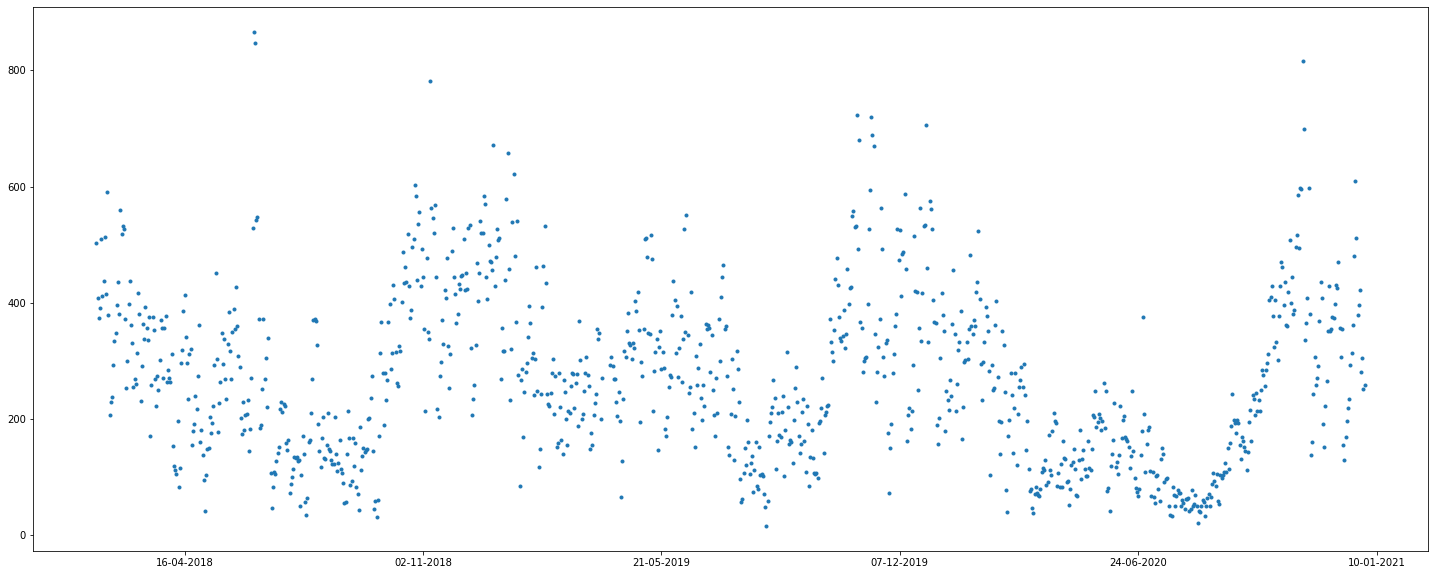

In [ ]:
plt.pyplot.figure(figsize=(25, 10))
plotField(df, 'PM10')

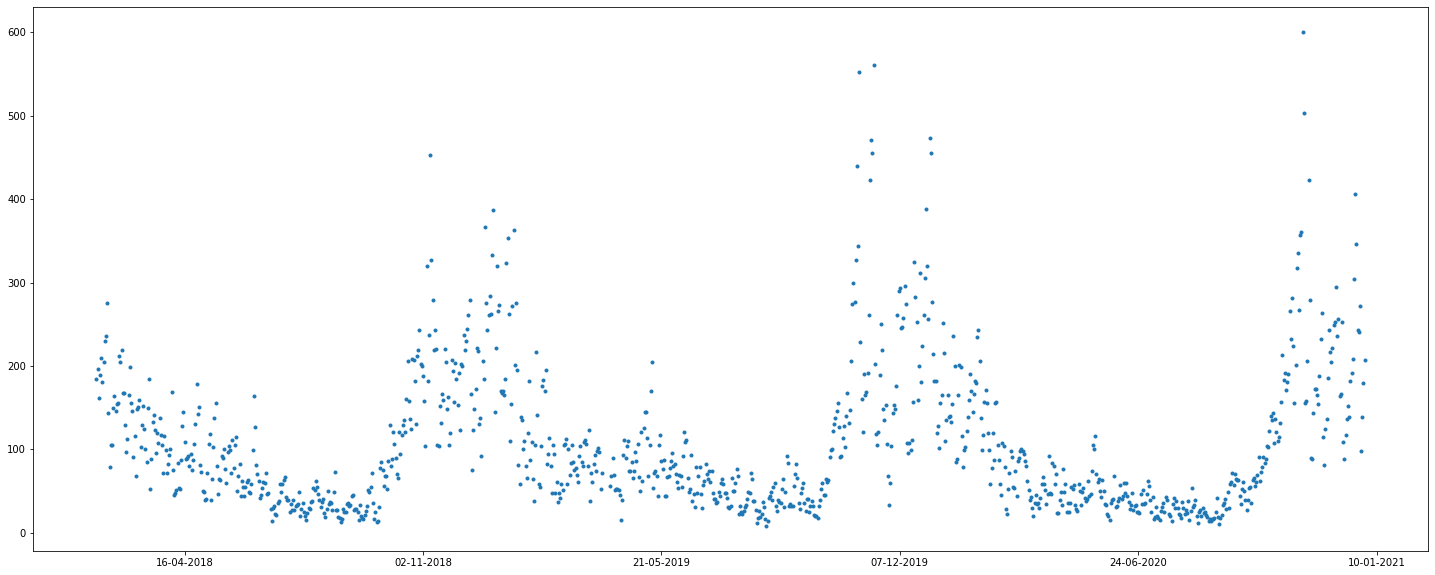

In [ ]:
plt.pyplot.figure(figsize=(25, 10))
plotField(df, 'PM2.5')

In [ ]:
oldDf = df.copy(deep = True)

In [ ]:
def toEpoch(dateObj):
    return float(dateObj.timestamp())

In [ ]:
df =  df.drop(columns=['To Date'])
df.rename(columns={'From Date': 'date'}, inplace=True, errors='raise')
df['date'] = df['date'].map(toEpoch)
df.date = df.date.sub(df.date.min())
df.date = df.date.divide(86400) # seconds in a day

In [ ]:
df

,date,PM10,PM2.5
0,0.0,502.68,184.35
1,1.0,407.58,196.88
2,2.0,374.00,162.05
3,3.0,391.08,189.44
4,4.0,510.54,210.00
...,...,...,...
1052,1060.0,421.45,272.40
1053,1061.0,280.23,97.50
1054,1062.0,305.64,138.62
1055,1063.0,251.10,179.60


# Linear Regression

In [ ]:
x = np.array(df.date.tolist())
x = np.reshape(x, (len(x), 1))
y = np.array(df['PM2.5'].tolist())
y = np.reshape(y, (len(y), 1))
print(x)
print(y)
assert len(x) == len(y)

[[0.000e+00]
 [1.000e+00]
 [2.000e+00]
 ...
 [1.062e+03]
 [1.063e+03]
 [1.064e+03]]
[[184.35]
 [196.88]
 [162.05]
 ...
 [138.62]
 [179.6 ]
 [206.8 ]]


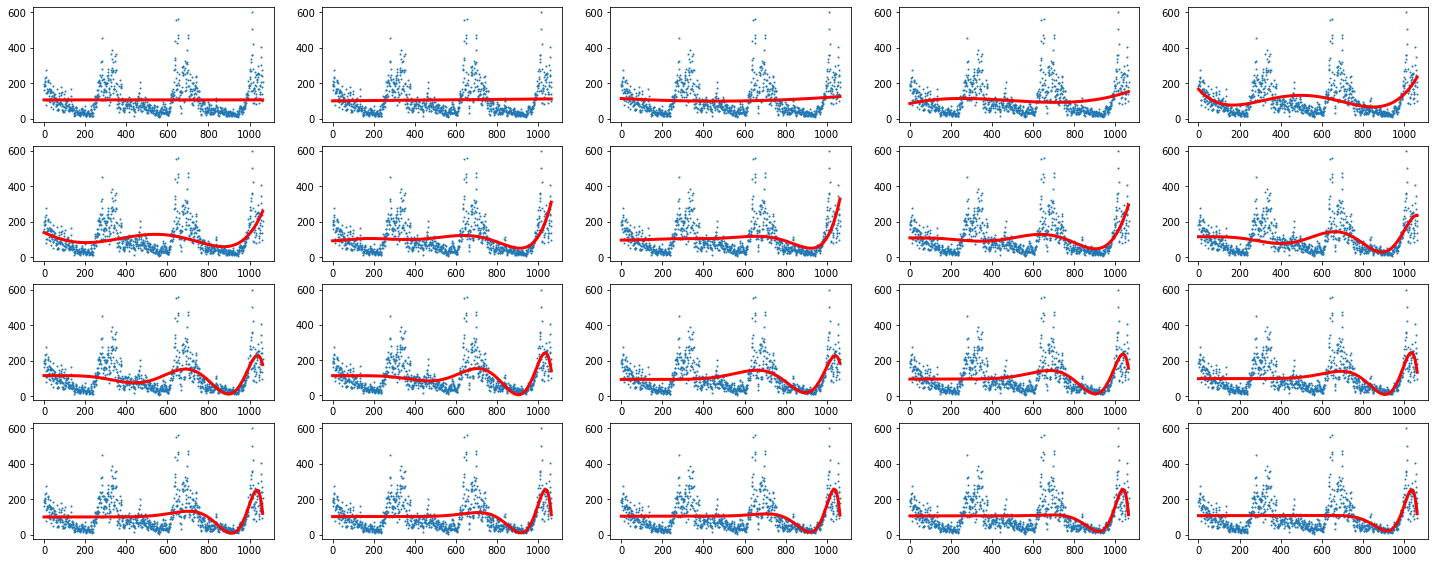

In [ ]:
count = 0
plt.pyplot.figure(figsize=(25, 20))
for i in range(20):

    features = PolynomialFeatures(degree=i)
    x_poly = features.fit_transform(x)
    model = LinearRegression()
    model.fit(x_poly, y)
    y_poly_pred = model.predict(x_poly)

    count += 1
    plt.pyplot.subplot(8, 5, count)
    plt.pyplot.scatter(x, y, s=1)
    plt.pyplot.plot(x, y_poly_pred, linewidth=3, color='r')

In [ ]:
features = PolynomialFeatures(degree=10)
x_poly = features.fit_transform(x)

In [ ]:
model = LinearRegression()
model.fit(x_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_poly_pred = model.predict(x_poly)

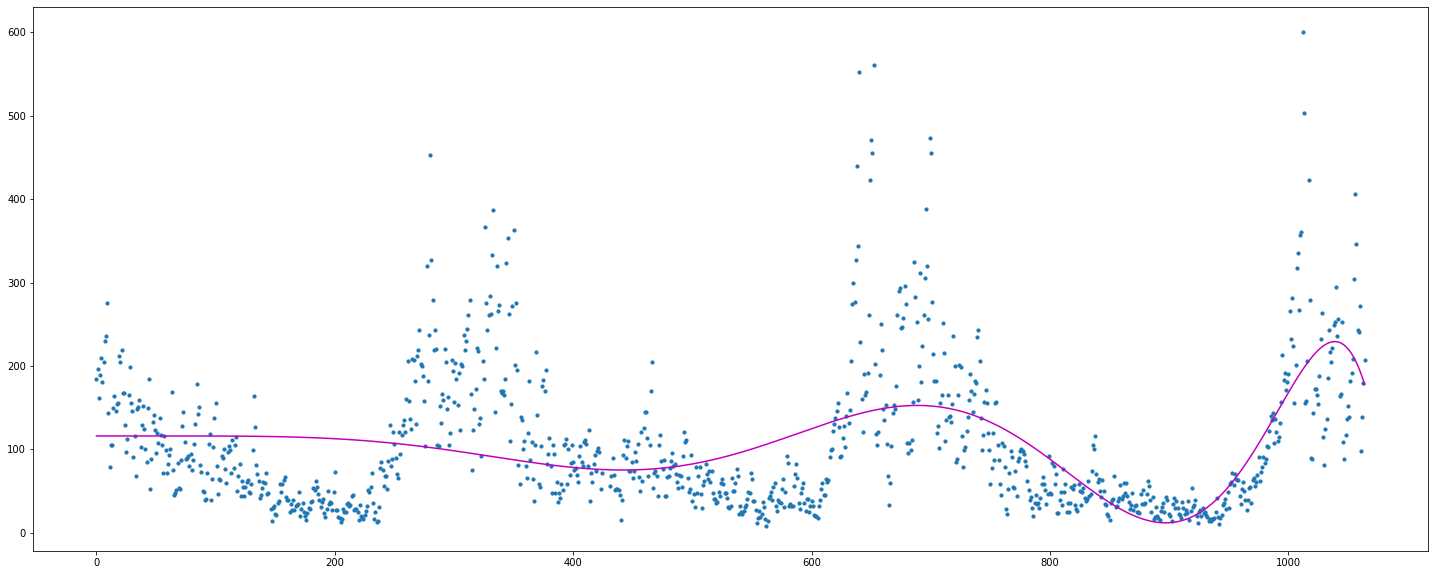

In [ ]:
plt.pyplot.figure(figsize=(25, 10))
plt.pyplot.scatter(x, y, s=10)
plt.pyplot.plot(x, y_poly_pred, color='m')

In [ ]:
rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
print(rmse)
print(r2)

76.7415669907581
0.20119383831014004


In [ ]:
# Import function to create training and test set splits
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import PolynomialFeatures# Import Linear Regression and a regularized regression function
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV# Finally, import function to make a machine learning pipeline
from sklearn.pipeline import make_pipeline

ModuleNotFoundError: ignored

In [ ]:
lasso_eps = 0.0001
lasso_nalpha=20
lasso_iter=5000

for degree in range(5, 30+1):
    model = make_pipeline(PolynomialFeatures(degree, interaction_only=False), LassoCV(eps=lasso_eps,n_alphas=lasso_nalpha,max_iter=lasso_iter,
normalize=True,cv=5))
    model.fit(X_train,y_train)
    test_pred = np.array(model.predict(X_test))
    RMSE = np.sqrt(np.sum(np.square(test_pred-y_test)))
    test_score = model.score(X_test,y_test)

NameError: ignored